# K - means

In [1]:
# 1. 라이브러리 불러오기

import numpy as np
import operator
import matplotlib.pyplot as plt
import random as rd

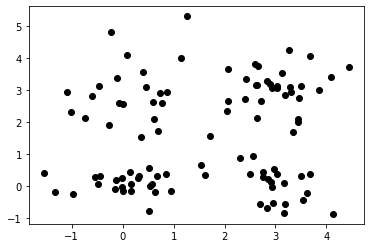

In [2]:
# 2. 임의의 데이터셋 생성

def generate_random_data(N=100):
  means = [[0, 0], [3, 3], [0, 3], [3, 0]]
  covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]],
          [[0.5, 0], [0, 1.0]], [[0.3, 0],  [0, 0.3]]]

  X = np.zeros((N, 2))
  for n in range(N):
    seed = rd.randint(0, 3)
    X[n] = np.random.multivariate_normal(means[seed], covs[seed])

  return X

# 기본 argument(N=100)을 사용하여 함수 실행, 데이터 변수 X를 생성
X = generate_random_data()

# Scatter plot 사용, 생성된 데이터 시각화
plt.scatter(X[:,0], X[:,1], c='k')



In [3]:
# 3. 첫 번째 작업으로 distance metric 준비

def euclidean_distance(a, b):
  return np.sqrt(np.sum((a-b)**2))

In [6]:
# 4. K-means 알고리즘 구현

def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
  N, d = X.shape
  
  centroids = np.zeros((K, d))

  sse = np.Inf

  # for bookkeeping
  log_sse = []
  log_c = []
  log_centroids = []

  # initialization
  for k in range(K):
    rand_index = rd.randint(0, N-1)
    centroids[k] = X[rand_index]
    # lof_centroids.append(centroids)

  # main process
  for i in range(max_iter): # 멤버십 결정
    # update the cluster membership
    c = []
    for n in range(max_iter): # n의 위치 결정 
      # update the centroids
      prev_centroids = centroids
      centroids = np.zeros(d)
      for k in range(K):
        if c[n] == k:
          tmp_sum += X[n]
          tmp_count += 1
        centroids[k] = tmp_sum / tmp_count
      log_centroids.append(centroids)

      # extimante the sum of the squared errors (sse)
      prev_sse = sse
      sse = 0
      for n in range(N):
        sse += distance_metric(X[n], centroids[c[n]]) ** 2
    log_sse.append(sse)

    # stopping criterion
    if prev_sse - sse < tol:
      break

  return c, centroids, log_centroids, log_c, log_sse

In [ ]:
# 5. k=4로 클러스터링 수행 후 scatter plot으로 나타내기

# execute the clustering 